## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import bostonDataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1

In [4]:
# Parameters
variance = 0.01


## Dataset 


In [5]:
#Parameters 
n_features = 13
n_samples= 506
n_target = 1 

In [6]:
X,Y = bostonDataset.boston_data()

         X1        X2        X3        X4        X5        X6        X7  \
0 -0.419782  0.284830 -1.287909 -0.272599 -0.144217  0.413672 -0.120013   
1 -0.417339 -0.487722 -0.593381 -0.272599 -0.740262  0.194274  0.367166   
2 -0.417342 -0.487722 -0.593381 -0.272599 -0.740262  1.282714 -0.265812   
3 -0.416750 -0.487722 -1.306878 -0.272599 -0.835284  1.016303 -0.809889   
4 -0.412482 -0.487722 -1.306878 -0.272599 -0.835284  1.228577 -0.511180   

         X8        X9       X10       X11       X12       X13         Y  
0  0.140214 -0.982843 -0.666608 -1.459000  0.441052 -1.075562  0.159686  
1  0.557160 -0.867883 -0.987329 -0.303094  0.441052 -0.492439 -0.101524  
2  0.557160 -0.867883 -0.987329 -0.303094  0.396427 -1.208727  1.324247  
3  1.077737 -0.752922 -1.106115  0.113032  0.416163 -1.361517  1.182758  
4  1.077737 -0.752922 -1.106115  0.113032  0.441052 -1.026501  1.487503  


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 64
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.033215
0:	learn: 0.9735053	total: 59.6ms	remaining: 59.5s
1:	learn: 0.9530851	total: 60.6ms	remaining: 30.2s
2:	learn: 0.9335841	total: 61.5ms	remaining: 20.4s
3:	learn: 0.9175388	total: 62.3ms	remaining: 15.5s
4:	learn: 0.9000268	total: 63.3ms	remaining: 12.6s
5:	learn: 0.8831382	total: 64.1ms	remaining: 10.6s
6:	learn: 0.8658426	total: 64.9ms	remaining: 9.21s
7:	learn: 0.8492335	total: 66ms	remaining: 8.18s
8:	learn: 0.8331022	total: 66.8ms	remaining: 7.35s
9:	learn: 0.8164198	total: 67.7ms	remaining: 6.7s
10:	learn: 0.8008915	total: 68.4ms	remaining: 6.15s
11:	learn: 0.7863318	total: 69.2ms	remaining: 5.7s
12:	learn: 0.7710633	total: 70.2ms	remaining: 5.33s
13:	learn: 0.7553173	total: 71.1ms	remaining: 5s
14:	learn: 0.7438596	total: 71.9ms	remaining: 4.72s
15:	learn: 0.7293082	total: 72.7ms	remaining: 4.47s
16:	learn: 0.7156913	total: 73.5ms	remaining: 4.25s
17:	learn: 0.7028313	total: 74.4ms	remaining: 4.06s
18:	learn: 0.6894291	total: 75.1ms	remaining: 3.88s

60:	learn: 0.4010743	total: 109ms	remaining: 1.67s
61:	learn: 0.3974778	total: 110ms	remaining: 1.66s
62:	learn: 0.3948360	total: 111ms	remaining: 1.64s
63:	learn: 0.3913909	total: 112ms	remaining: 1.63s
64:	learn: 0.3882527	total: 112ms	remaining: 1.62s
65:	learn: 0.3843361	total: 113ms	remaining: 1.6s
66:	learn: 0.3811241	total: 114ms	remaining: 1.59s
67:	learn: 0.3784052	total: 115ms	remaining: 1.57s
68:	learn: 0.3753549	total: 116ms	remaining: 1.56s
69:	learn: 0.3721721	total: 117ms	remaining: 1.55s
70:	learn: 0.3695358	total: 118ms	remaining: 1.54s
71:	learn: 0.3656871	total: 118ms	remaining: 1.53s
72:	learn: 0.3633246	total: 119ms	remaining: 1.51s
73:	learn: 0.3595915	total: 120ms	remaining: 1.5s
74:	learn: 0.3572179	total: 121ms	remaining: 1.49s
75:	learn: 0.3550626	total: 122ms	remaining: 1.48s
76:	learn: 0.3524802	total: 123ms	remaining: 1.47s
77:	learn: 0.3493118	total: 123ms	remaining: 1.46s
78:	learn: 0.3470759	total: 124ms	remaining: 1.45s
79:	learn: 0.3450876	total: 125ms

157:	learn: 0.2499108	total: 192ms	remaining: 1.02s
158:	learn: 0.2490607	total: 193ms	remaining: 1.02s
159:	learn: 0.2489249	total: 194ms	remaining: 1.02s
160:	learn: 0.2479353	total: 194ms	remaining: 1.01s
161:	learn: 0.2472284	total: 195ms	remaining: 1.01s
162:	learn: 0.2465972	total: 196ms	remaining: 1.01s
163:	learn: 0.2460615	total: 197ms	remaining: 1s
164:	learn: 0.2452758	total: 198ms	remaining: 1s
165:	learn: 0.2449685	total: 198ms	remaining: 997ms
166:	learn: 0.2438001	total: 199ms	remaining: 993ms
167:	learn: 0.2430208	total: 200ms	remaining: 990ms
168:	learn: 0.2424887	total: 201ms	remaining: 987ms
169:	learn: 0.2420400	total: 202ms	remaining: 984ms
170:	learn: 0.2412743	total: 202ms	remaining: 981ms
171:	learn: 0.2405696	total: 203ms	remaining: 978ms
172:	learn: 0.2399897	total: 204ms	remaining: 975ms
173:	learn: 0.2393377	total: 205ms	remaining: 972ms
174:	learn: 0.2388932	total: 206ms	remaining: 969ms
175:	learn: 0.2382597	total: 206ms	remaining: 966ms
176:	learn: 0.2377

287:	learn: 0.1880970	total: 298ms	remaining: 738ms
288:	learn: 0.1877966	total: 299ms	remaining: 737ms
289:	learn: 0.1874525	total: 300ms	remaining: 735ms
290:	learn: 0.1868409	total: 301ms	remaining: 733ms
291:	learn: 0.1864520	total: 302ms	remaining: 732ms
292:	learn: 0.1860304	total: 302ms	remaining: 730ms
293:	learn: 0.1853537	total: 303ms	remaining: 728ms
294:	learn: 0.1847161	total: 304ms	remaining: 727ms
295:	learn: 0.1840642	total: 305ms	remaining: 725ms
296:	learn: 0.1833731	total: 306ms	remaining: 724ms
297:	learn: 0.1827624	total: 307ms	remaining: 722ms
298:	learn: 0.1823276	total: 307ms	remaining: 721ms
299:	learn: 0.1820773	total: 308ms	remaining: 719ms
300:	learn: 0.1813691	total: 309ms	remaining: 718ms
301:	learn: 0.1811999	total: 310ms	remaining: 716ms
302:	learn: 0.1809331	total: 311ms	remaining: 715ms
303:	learn: 0.1808726	total: 311ms	remaining: 713ms
304:	learn: 0.1803346	total: 312ms	remaining: 711ms
305:	learn: 0.1798331	total: 313ms	remaining: 710ms
306:	learn: 

388:	learn: 0.1492307	total: 383ms	remaining: 601ms
389:	learn: 0.1487966	total: 384ms	remaining: 600ms
390:	learn: 0.1484825	total: 384ms	remaining: 599ms
391:	learn: 0.1480819	total: 385ms	remaining: 597ms
392:	learn: 0.1476661	total: 386ms	remaining: 596ms
393:	learn: 0.1472955	total: 387ms	remaining: 595ms
394:	learn: 0.1468839	total: 388ms	remaining: 594ms
395:	learn: 0.1465264	total: 388ms	remaining: 593ms
396:	learn: 0.1462465	total: 389ms	remaining: 591ms
397:	learn: 0.1462087	total: 390ms	remaining: 590ms
398:	learn: 0.1459558	total: 391ms	remaining: 589ms
399:	learn: 0.1455019	total: 392ms	remaining: 587ms
400:	learn: 0.1452767	total: 392ms	remaining: 586ms
401:	learn: 0.1448624	total: 393ms	remaining: 585ms
402:	learn: 0.1446255	total: 394ms	remaining: 584ms
403:	learn: 0.1443414	total: 395ms	remaining: 583ms
404:	learn: 0.1440603	total: 396ms	remaining: 581ms
405:	learn: 0.1439114	total: 397ms	remaining: 580ms
406:	learn: 0.1435794	total: 397ms	remaining: 579ms
407:	learn: 

516:	learn: 0.1172139	total: 488ms	remaining: 456ms
517:	learn: 0.1169488	total: 489ms	remaining: 455ms
518:	learn: 0.1169276	total: 490ms	remaining: 454ms
519:	learn: 0.1167868	total: 491ms	remaining: 453ms
520:	learn: 0.1166310	total: 492ms	remaining: 452ms
521:	learn: 0.1166012	total: 493ms	remaining: 451ms
522:	learn: 0.1165792	total: 493ms	remaining: 450ms
523:	learn: 0.1162567	total: 494ms	remaining: 449ms
524:	learn: 0.1159869	total: 495ms	remaining: 448ms
525:	learn: 0.1157923	total: 496ms	remaining: 447ms
526:	learn: 0.1155615	total: 497ms	remaining: 446ms
527:	learn: 0.1153258	total: 498ms	remaining: 445ms
528:	learn: 0.1150620	total: 498ms	remaining: 444ms
529:	learn: 0.1147602	total: 499ms	remaining: 443ms
530:	learn: 0.1145684	total: 500ms	remaining: 442ms
531:	learn: 0.1143076	total: 501ms	remaining: 440ms
532:	learn: 0.1141731	total: 501ms	remaining: 439ms
533:	learn: 0.1139170	total: 502ms	remaining: 438ms
534:	learn: 0.1135797	total: 503ms	remaining: 437ms
535:	learn: 

620:	learn: 0.0988313	total: 572ms	remaining: 349ms
621:	learn: 0.0987078	total: 573ms	remaining: 348ms
622:	learn: 0.0985233	total: 574ms	remaining: 347ms
623:	learn: 0.0982137	total: 575ms	remaining: 346ms
624:	learn: 0.0982023	total: 575ms	remaining: 345ms
625:	learn: 0.0980503	total: 576ms	remaining: 344ms
626:	learn: 0.0979199	total: 577ms	remaining: 343ms
627:	learn: 0.0977895	total: 578ms	remaining: 342ms
628:	learn: 0.0976781	total: 579ms	remaining: 342ms
629:	learn: 0.0975084	total: 580ms	remaining: 340ms
630:	learn: 0.0974207	total: 581ms	remaining: 340ms
631:	learn: 0.0974097	total: 581ms	remaining: 339ms
632:	learn: 0.0971982	total: 582ms	remaining: 338ms
633:	learn: 0.0970538	total: 583ms	remaining: 337ms
634:	learn: 0.0969114	total: 584ms	remaining: 336ms
635:	learn: 0.0967180	total: 585ms	remaining: 335ms
636:	learn: 0.0966110	total: 586ms	remaining: 334ms
637:	learn: 0.0964563	total: 587ms	remaining: 333ms
638:	learn: 0.0964393	total: 587ms	remaining: 332ms
639:	learn: 

748:	learn: 0.0803887	total: 679ms	remaining: 227ms
749:	learn: 0.0803087	total: 679ms	remaining: 226ms
750:	learn: 0.0802030	total: 680ms	remaining: 226ms
751:	learn: 0.0800781	total: 681ms	remaining: 225ms
752:	learn: 0.0799008	total: 682ms	remaining: 224ms
753:	learn: 0.0797317	total: 683ms	remaining: 223ms
754:	learn: 0.0796779	total: 683ms	remaining: 222ms
755:	learn: 0.0795241	total: 684ms	remaining: 221ms
756:	learn: 0.0795146	total: 685ms	remaining: 220ms
757:	learn: 0.0793396	total: 686ms	remaining: 219ms
758:	learn: 0.0791960	total: 687ms	remaining: 218ms
759:	learn: 0.0790760	total: 687ms	remaining: 217ms
760:	learn: 0.0789714	total: 688ms	remaining: 216ms
761:	learn: 0.0788327	total: 689ms	remaining: 215ms
762:	learn: 0.0787105	total: 690ms	remaining: 214ms
763:	learn: 0.0785944	total: 691ms	remaining: 213ms
764:	learn: 0.0784297	total: 691ms	remaining: 212ms
765:	learn: 0.0782823	total: 692ms	remaining: 211ms
766:	learn: 0.0780473	total: 693ms	remaining: 211ms
767:	learn: 

850:	learn: 0.0693031	total: 762ms	remaining: 133ms
851:	learn: 0.0692005	total: 763ms	remaining: 133ms
852:	learn: 0.0690791	total: 764ms	remaining: 132ms
853:	learn: 0.0689583	total: 765ms	remaining: 131ms
854:	learn: 0.0689197	total: 766ms	remaining: 130ms
855:	learn: 0.0688952	total: 766ms	remaining: 129ms
856:	learn: 0.0687774	total: 767ms	remaining: 128ms
857:	learn: 0.0687244	total: 768ms	remaining: 127ms
858:	learn: 0.0685521	total: 769ms	remaining: 126ms
859:	learn: 0.0684707	total: 770ms	remaining: 125ms
860:	learn: 0.0684627	total: 771ms	remaining: 124ms
861:	learn: 0.0683129	total: 771ms	remaining: 123ms
862:	learn: 0.0682553	total: 772ms	remaining: 123ms
863:	learn: 0.0680872	total: 773ms	remaining: 122ms
864:	learn: 0.0679323	total: 774ms	remaining: 121ms
865:	learn: 0.0678657	total: 775ms	remaining: 120ms
866:	learn: 0.0676669	total: 776ms	remaining: 119ms
867:	learn: 0.0675651	total: 776ms	remaining: 118ms
868:	learn: 0.0674935	total: 777ms	remaining: 117ms
869:	learn: 

979:	learn: 0.0575392	total: 868ms	remaining: 17.7ms
980:	learn: 0.0574998	total: 869ms	remaining: 16.8ms
981:	learn: 0.0574639	total: 870ms	remaining: 15.9ms
982:	learn: 0.0573681	total: 871ms	remaining: 15.1ms
983:	learn: 0.0572453	total: 872ms	remaining: 14.2ms
984:	learn: 0.0571835	total: 872ms	remaining: 13.3ms
985:	learn: 0.0570320	total: 873ms	remaining: 12.4ms
986:	learn: 0.0570083	total: 874ms	remaining: 11.5ms
987:	learn: 0.0569557	total: 875ms	remaining: 10.6ms
988:	learn: 0.0568794	total: 876ms	remaining: 9.74ms
989:	learn: 0.0568083	total: 877ms	remaining: 8.85ms
990:	learn: 0.0567364	total: 878ms	remaining: 7.97ms
991:	learn: 0.0565878	total: 878ms	remaining: 7.08ms
992:	learn: 0.0565087	total: 879ms	remaining: 6.2ms
993:	learn: 0.0564465	total: 880ms	remaining: 5.31ms
994:	learn: 0.0563369	total: 881ms	remaining: 4.43ms
995:	learn: 0.0563303	total: 882ms	remaining: 3.54ms
996:	learn: 0.0562605	total: 883ms	remaining: 2.65ms
997:	learn: 0.0561927	total: 883ms	remaining: 1

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape)
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)

mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MAE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MAE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

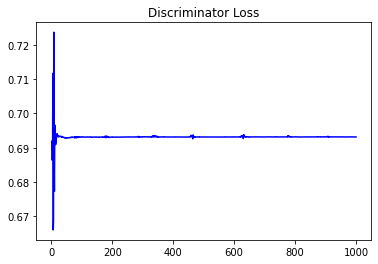

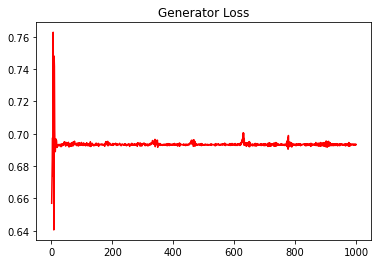

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,0,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,0,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.16308185600118252


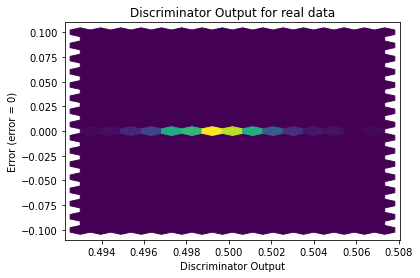

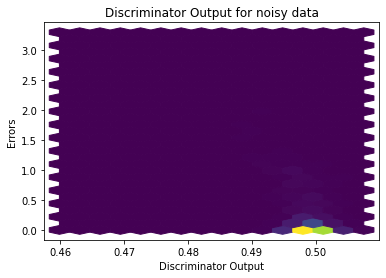

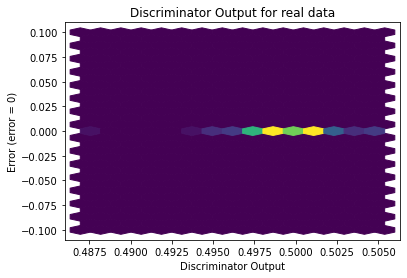

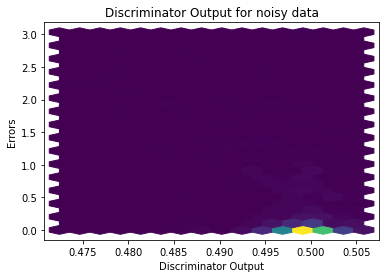

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


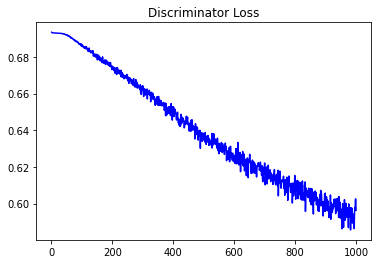

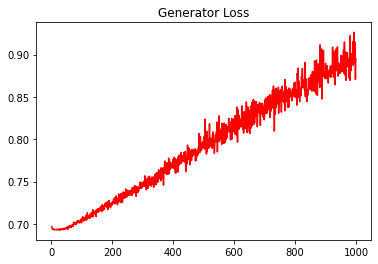

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,0,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,0,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.15919980481051796


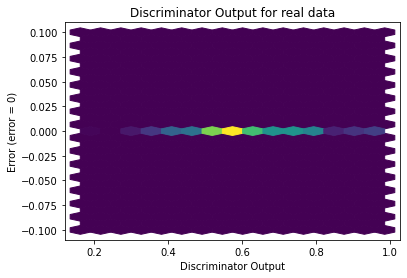

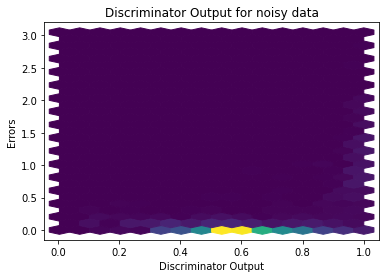

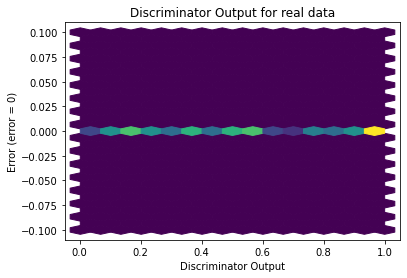

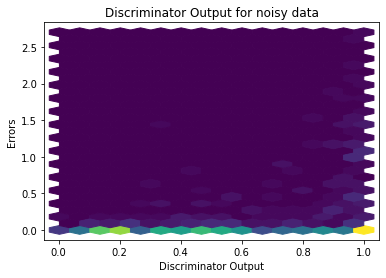

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.]], requires_grad=True)
